In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#from google.colab import files
#uploaded = files.upload()

#with open('wiki.txt', 'r') as file:
  #  content = file.read()

In [ ]:
pip install xlrd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
gdp = pd.read_excel(r'gdp new.xls')
manual_headers = ['Country', 'Country Code', 'Indicator Type', 'Indicator Code']
num_columns = len(gdp.columns)
default_headers = [str(year) for year in range(1990, 2018)]

# Assign default headers to the DataFrame
all_headers = manual_headers + default_headers

# Assign headers to the DataFrame columns
gdp.columns = all_headers

# Assuming 'df' is your DataFrame
columns_to_drop = ['Country Code', 'Indicator Type', 'Indicator Code']
gdp.drop(columns=columns_to_drop, inplace=True)

gdp = pd.DataFrame(gdp)

# Reset index and drop the 'index' column if it exists
if 'index' in gdp.columns:
    gdp.drop('index', axis=1, inplace=True)

gdp.reset_index(drop=True, inplace=True)

# Melt the DataFrame to convert years as columns to a single 'Year' column
gdp = gdp.melt(id_vars='Country', var_name='Year', value_name='GDP')

# Display the resulting DataFrame
gdp.sort_values(by=['Year'])

,Country,Year,GDP
0,Aruba,1990,NaN
167,Malaysia,1990,6819.885822
168,North America,1990,23569.691564
169,Namibia,1990,3696.560910
170,New Caledonia,1990,NaN
...,...,...,...
7221,High income,2017,47304.581233
7222,"Hong Kong SAR, China",2017,61540.158311
7223,Honduras,2017,4986.231360
7209,Ghana,2017,4641.323379


In [ ]:
suicideRates = pd.read_csv('crude suicide rates.csv')
first_row = suicideRates.iloc[0]
new_columns = [f"{col}_{val}" for col, val in zip(suicideRates.columns, first_row)]

# Rename the columns with modified names
suicideRates.columns = new_columns

# Remove the first row from the DataFrame
suicideRates = suicideRates.iloc[1:].reset_index(drop=True)
suicideRates = suicideRates.rename(columns={'Unnamed: 0_Country': 'Country','Unnamed: 1_Year': 'Year',
                                              'Crude suicide rates (per 100 000 population)_Both sexes': 'Suicide Rate Both Genders'})
# select only the columns we want to explore
selected_columns = ['Country', 'Year', 'Suicide Rate Both Genders']  # Add the names of the columns you want to keep

suicideRates = suicideRates[selected_columns]

# Display the resulting DataFrame with selected columns
suicideRates.sort_values(by=['Year'])

,Country,Year,Suicide Rate Both Genders
914,Zimbabwe,2000,12.9
344,Guinea,2000,6.3
149,Cameroon,2000,13.3
569,Namibia,2000,10.9
759,South Sudan,2000,4.8
...,...,...,...
690,Samoa,2016,4.4
220,Democratic People's Republic of Korea,2016,11.2
695,Sao Tome and Principe,2016,2.3
700,Saudi Arabia,2016,3.2


In [ ]:
prevalanceSubstanceDisorders = pd.read_csv('share-with-alcohol-and-substance-use-disorders 1990-2016.csv')
prevalanceSubstanceDisorders = prevalanceSubstanceDisorders.rename(columns={'Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)': 'Substance Abuse Both Genders','Entity':'Country'})
prevalanceSubstanceDisorders.sort_values(by=['Year'])

,Country,Code,Year,Substance Abuse Both Genders
0,Afghanistan,AFG,1990,1.530549
2376,High-income Asia Pacific,NaN,1990,1.928670
2403,High-middle SDI,NaN,1990,3.095741
5508,Tonga,TON,1990,1.515001
2430,Honduras,HND,1990,2.056772
...,...,...,...,...
3806,Netherlands,NLD,2016,1.869502
3779,Nepal,NPL,2016,2.067171
3752,Namibia,NAM,2016,2.297560
4049,Northern Mariana Islands,MNP,2016,1.786518


In [ ]:
unemployment = pd.read_excel(r'Unemployment worldbank 1991-2017.xlsx',skiprows=3)

# Set the first row as column headers
column_names = unemployment.iloc[0]
unemployment.columns = column_names

# Drop the first row (as it is now the column headers)
unemployment = unemployment.drop(0)

# Drop unneeded columns
unemployment = unemployment.drop(columns=['Country Code','Indicator Name','Indicator Code'], axis=1).iloc[:, :-1]
unemployment = unemployment.rename(columns={'Country Name':'Country'})
unemployment

# Melt the DataFrame to convert years as rows to a single 'Year' column
unemployment_longitudinal = unemployment.melt(id_vars=['Country'], var_name='Year', value_name='Unemployment Rate')
unemployment_longitudinal.sort_values(by=['Year'])

,Country,Year,Unemployment Rate
0,Aruba,1991,NaN
167,Malaysia,1991,3.76200008392334
168,North America,1991,7.19014281789911
169,Namibia,1991,19.1399993896484
170,New Caledonia,1991,18.9769992828369
...,...,...,...
6957,High income,2017,5.67722241334652
6958,Hong Kong SAR,2017,3.3529999256134
6959,Honduras,2017,4.48600006103516
6945,Ghana,2017,2.35500001907349


In [ ]:
# Ensure the Year values are in the same format
gdp['Year'] = gdp['Year'].astype(str)
suicideRates['Year'] = suicideRates['Year'].astype(str)
prevalanceSubstanceDisorders['Year'] = prevalanceSubstanceDisorders['Year'].astype(str)
unemployment_longitudinal['Year'] = unemployment_longitudinal['Year'].astype(str)

# Merge both DataFrames on the 'Country' and 'Year' columns
mergedData = pd.merge(gdp, suicideRates, on=['Country', 'Year'], how='inner')
mergedData = pd.merge(mergedData, prevalanceSubstanceDisorders[['Country', 'Year', 'Substance Abuse Both Genders']], on=['Country', 'Year'], how='inner')
mergedData = pd.merge(mergedData, unemployment_longitudinal[['Country', 'Year', 'Unemployment Rate']], on=['Country', 'Year'], how='inner')

mergedData = mergedData.dropna()

# modify years included
selectedYears = ['2000','2005','2010','2015','2016']
mergedData = mergedData[mergedData['Year'].isin(selectedYears)]
mergedData = mergedData.dropna()
selectedYears = ['2000','2005','2010','2015','2016']
mergedData = mergedData[mergedData['Year'].isin(selectedYears)]
mergedData['Unemployment Rate'] = pd.to_numeric(mergedData['Unemployment Rate'], errors='coerce')

# Filter rows where the 'Unemployment Rate' column contains NaN values
mergedData = mergedData[~mergedData['Unemployment Rate'].isnull()]
mergedData

,Country,Year,GDP,Suicide Rate Both Genders,Substance Abuse Both Genders,Unemployment Rate
1,Angola,2000,2277.374611,7.9,1.902439,23.733999
2,Albania,2000,4029.016971,5.5,2.163369,22.730000
4,Argentina,2000,11810.061364,9.5,3.537142,15.000000
5,Armenia,2000,2318.238073,3.3,2.277958,11.943000
7,Australia,2000,26316.947878,13.2,4.035073,6.280000
...,...,...,...,...,...,...
755,Vanuatu,2016,3080.565754,4.5,1.577418,5.267000
756,Samoa,2016,6378.256567,4.4,1.586445,8.487000
757,South Africa,2016,13250.588325,11.6,2.169114,26.549999
758,Zambia,2016,3938.663188,6.1,2.143914,7.777000


In [ ]:
"""
suicideRate2000 = mergedData.loc[mergedData['Year'] == '2000', 'Suicide Rate Both Genders']
suicideRate2000_mean = np.mean(suicideRate2000)
suicideRate2000_median = np.median(suicideRate2000)
suicideRate2005 = mergedData.loc[mergedData['Year'] == '2005', 'Suicide Rate Both Genders']
suicideRate2005_mean = np.mean(suicideRate2005)
suicideRate2005_median = np.median(suicideRate2005)
suicideRate2010 = mergedData.loc[mergedData['Year'] == '2010', 'Suicide Rate Both Genders']
suicideRate2010_mean = np.mean(suicideRate2010)
suicideRate2010_median = np.median(suicideRate2010)
suicideRate2015 = mergedData.loc[mergedData['Year'] == '2015', 'Suicide Rate Both Genders']
suicideRate2015_mean = np.mean(suicideRate2015)
suicideRate2015_median = np.median(suicideRate2015)
suicideRate2016 = mergedData.loc[mergedData['Year'] == '2016', 'Suicide Rate Both Genders']
suicideRate2016_mean = np.mean(suicideRate2016)
suicideRate2016_median = np.median(suicideRate2016)

suicideRate2000_range = np.ptp(suicideRate2000)
suicideRate2005_range = np.ptp(suicideRate2005)
suicideRate2010_range = np.ptp(suicideRate2010)
suicideRate2015_range = np.ptp(suicideRate2015)
suicideRate2016_range = np.ptp(suicideRate2016)

print('Suicide Rate stats')
print('2000 mean,median,range:',suicideRate2000_mean, suicideRate2000_median , suicideRate2000_range)
print('2005 mean,median,range:',suicideRate2005_mean, suicideRate2005_median, suicideRate2005_range)
print('2010 mean,median,range:',suicideRate2010_mean, suicideRate2010_median, suicideRate2010_range)
print('2015 mean,median,range:',suicideRate2015_mean, suicideRate2015_median, suicideRate2015_range)
print('2016 mean,median,range:',suicideRate2016_mean, suicideRate2016_median, suicideRate2016_range)
"""

TypeError: ignored

TypeError: ignored

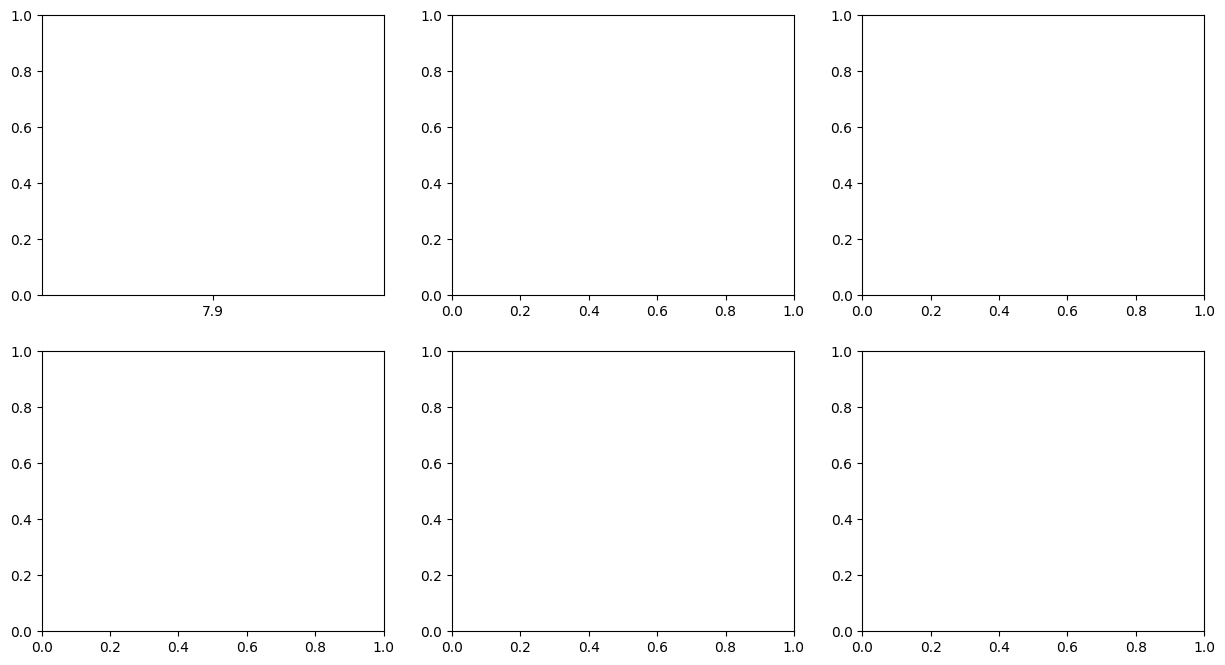

In [ ]:
# Convert 'Year' column to numeric
mergedData['Year'] = pd.to_numeric(mergedData['Year'], errors='coerce')

# Create subplots for each year (including 2015)
fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # Create a grid for 2 rows and 3 columns

years = ['2000', '2005', '2010', '2015', '2016']  # Add '2015' to the list of years

# Lists to store all Suicide Rate values for setting common limits
all_suicide_values = []

# Determine the maximum Suicide Rate value in the entire dataset
max_suicide_value = mergedData['Suicide Rate Both Genders'].max()

# Set the number of desired bins
num_bins = 10  # You can adjust the number of bins here

max_freq = 0  # Initialize max frequency

for i, year in enumerate(years):
    row = i // 3
    col = i % 3

    # Filter Suicide Rate values for the specific year
    suicide_values = mergedData.loc[mergedData['Year'] == int(year), 'Suicide Rate Both Genders']
    all_suicide_values.append(suicide_values)

    freq, _, _ = axs[row, col].hist(suicide_values, bins=num_bins, range=(0, max_suicide_value), edgecolor='black')
    axs[row, col].set_xlabel('Suicide Rate')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Distribution of Suicide Rate in {year}')

    # Update max frequency if higher than previous subplots
    max_freq = max(max_freq, max(freq))

# Set the same y-axis limits for all subplots based on the maximum frequency
for ax in axs.flat:
    ax.set_ylim(0, max_freq + 2)  # Adjust margin for y-axis

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In [ ]:
# Convert 'Year' column to numeric
mergedData['Year'] = pd.to_numeric(mergedData['Year'], errors='coerce')

# Create the boxplot without fill color
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Suicide Rate Both Genders', data=mergedData, whis=1.5, showfliers=False)

plt.title('Suicide Rate Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')

plt.show()

In [ ]:
#FINDING THE TOP AND BOTTOM COUNTRIES

In [ ]:
#COUNTRY INFO SUICIDE RATES

import pandas as pd

# Assuming mergedData is your DataFrame with columns 'Country', 'Year', 'SuicideRate', 'Unemployment Rate'
# Replace these column names with your actual column names

# Convert 'Unemployment Rate' column to numeric (assuming it contains numbers or can be converted to numbers)
mergedData['Suicide Rate Both Genders'] = pd.to_numeric(mergedData['Suicide Rate Both Genders'], errors='coerce')

# Group by 'Country' and calculate the sum of 'Unemployment Rate'
grouped_data_sr = mergedData.groupby('Country')['Suicide Rate Both Genders'].sum()

# Calculate the average unemployment rate for each country
average_sr = grouped_data_sr / mergedData.groupby('Country')['Year'].nunique()

# Sort countries based on average unemployment rate in descending order
sorted_countries_sr = average_sr.sort_values(ascending=False)

# Find the country with the highest and lowest average unemployment rates
country_highest_sr = average_sr.idxmax()
country_lowest_sr = average_sr.idxmin()
highest_sr = average_sr.max()
lowest_sr = average_sr.min()

# Find the country with the middle unemployment rate
middle_index_sr = len(sorted_countries_sr) // 2
country_middle_sr = sorted_countries_sr.index[middle_index_sr]
middle_sr = sorted_countries_sr.iloc[middle_index_sr]

print(f"Country with the highest average Suicide Rate: {country_highest_sr} SR: {highest_sr}")
print(f"Country with the lowest average Suicide Rate: {country_lowest_sr} SR: {lowest_sr}")
print(f"Country with the middle average Suicide Rate: {country_middle_sr} SR: {middle_sr}")


# Print the top five and bottom five countries with the highest average unemployment rates
top_five_countries_sr= sorted_countries_sr.head(5)
bottom_five_countries_sr = sorted_countries_sr.tail(5)

print("\nTop five countries with the highest average Suicide Rate:")
print(top_five_countries_sr)

print("\nBottom five countries with the highest average Suicide Rate:")
print(bottom_five_countries_sr)

# Calculate and print the middle five countries based on average unemployment rates
num_countries_sr = len(sorted_countries_sr)
middle_start_sr = max(0, middle_index_sr - 2)
middle_end_sr = min(num_countries_sr, middle_index_sr + 3)
middle_five_countries_sr = sorted_countries_sr.iloc[middle_start_sr:middle_end_sr]

print("\nMiddle five countries with the highest average Suicide Rate:")
print(middle_five_countries_sr)


In [ ]:
#VISUALIZATIONS

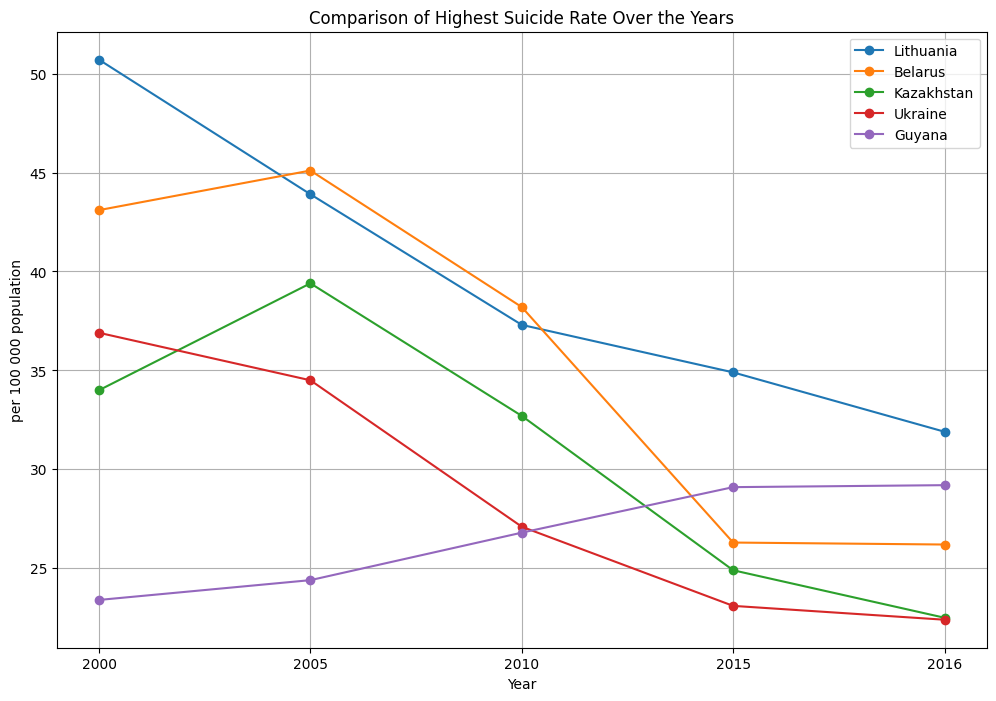

In [ ]:
#Comparison of Suicide Rates w/ Merged Data
#Highest Suicide Rates

import pandas as pd
import matplotlib.pyplot as plt

def plot_countries_data(df, country_names):
    plt.figure(figsize=(12, 8))

    for country_name in country_names:
        # Filter rows based on the specified country
        country_data = df[df['Country'] == country_name]

        if country_data.empty:
            print(f"No data found for {country_name}")
            continue

        # Sort the data by 'Year'
        country_data = country_data.sort_values(by='Year')

        # Convert 'Suicide Rate Both Genders' to numeric
        country_data['Suicide Rate Both Genders'] = pd.to_numeric(country_data['Suicide Rate Both Genders'], errors='coerce')

        # Plotting for each country
        plt.plot(country_data['Year'], country_data['Suicide Rate Both Genders'], label=country_name, marker='o')

    # Plotting settings
    plt.title('Comparison of Highest Suicide Rate Over the Years')
    plt.xlabel('Year')
    plt.ylabel('per 100 000 population')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'merged_data' is your new DataFrame
# Replace ['Country1', 'Country2', 'Country3'] with the list of countries you want to compare
countries_to_compare = ['Lithuania', 'Belarus', 'Kazakhstan', 'Ukraine', 'Guyana' ]

plot_countries_data(mergedData, countries_to_compare)

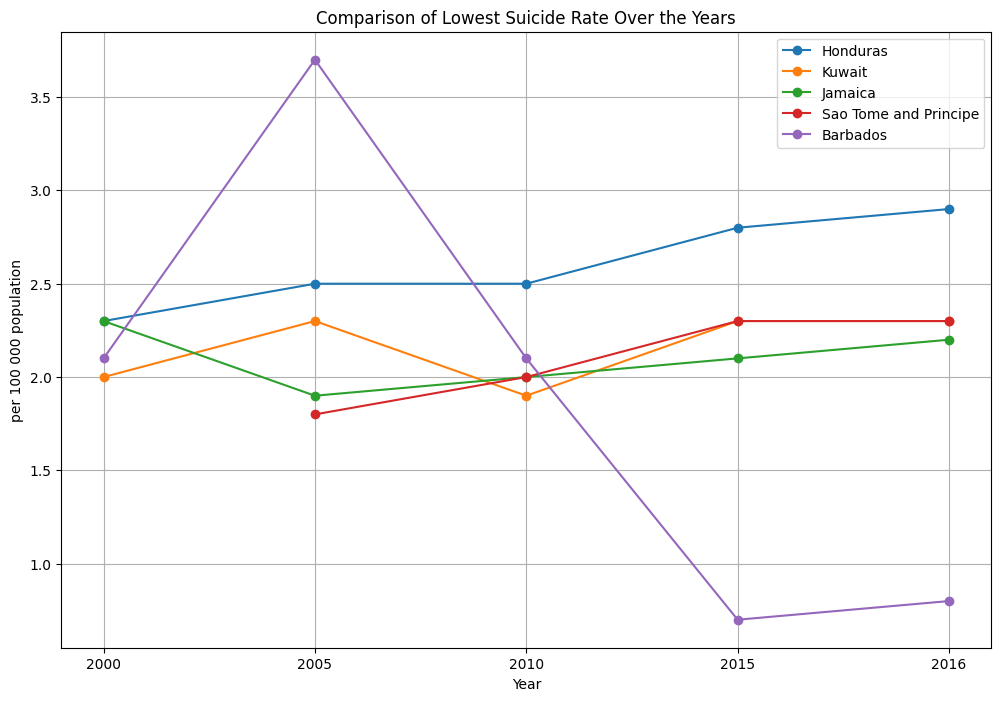

In [ ]:
#Comparison of Suicide Rates w/ Merged Data
#Lowest Suicide Rates

import pandas as pd
import matplotlib.pyplot as plt

def plot_countries_data(df, country_names):
    plt.figure(figsize=(12, 8))

    for country_name in country_names:
        # Filter rows based on the specified country
        country_data = df[df['Country'] == country_name]

        if country_data.empty:
            print(f"No data found for {country_name}")
            continue

        # Sort the data by 'Year'
        country_data = country_data.sort_values(by='Year')

        # Convert 'Suicide Rate Both Genders' to numeric
        country_data['Suicide Rate Both Genders'] = pd.to_numeric(country_data['Suicide Rate Both Genders'], errors='coerce')

        # Plotting for each country
        plt.plot(country_data['Year'], country_data['Suicide Rate Both Genders'], label=country_name, marker='o')

    # Plotting settings
    plt.title('Comparison of Lowest Suicide Rate Over the Years')
    plt.xlabel('Year')
    plt.ylabel('per 100 000 population')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'merged_data' is your new DataFrame
# Replace ['Country1', 'Country2', 'Country3'] with the list of countries you want to compare
countries_to_compare = ['Honduras', 'Kuwait', 'Jamaica', 'Sao Tome and Principe', 'Barbados' ]

plot_countries_data(mergedData, countries_to_compare)

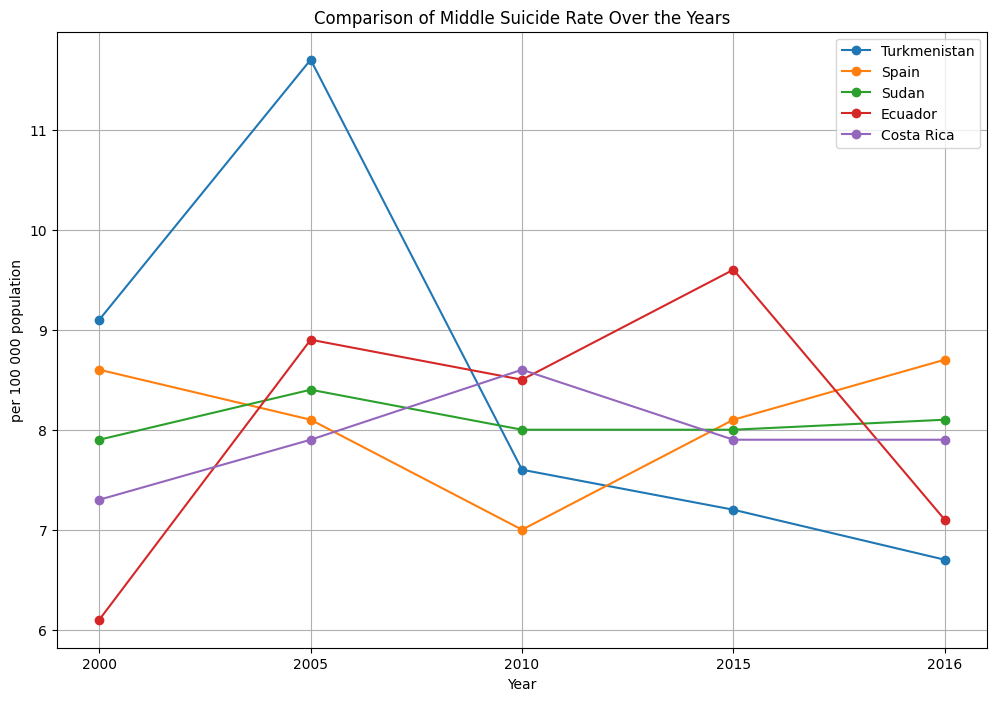

In [ ]:
#Comparison of Suicide Rates w/ Merged Data
#Middle

import pandas as pd
import matplotlib.pyplot as plt

def plot_countries_data(df, country_names):
    plt.figure(figsize=(12, 8))

    for country_name in country_names:
        # Filter rows based on the specified country
        country_data = df[df['Country'] == country_name]

        if country_data.empty:
            print(f"No data found for {country_name}")
            continue

        # Sort the data by 'Year'
        country_data = country_data.sort_values(by='Year')

        # Convert 'Suicide Rate Both Genders' to numeric
        country_data['Suicide Rate Both Genders'] = pd.to_numeric(country_data['Suicide Rate Both Genders'], errors='coerce')

        # Plotting for each country
        plt.plot(country_data['Year'], country_data['Suicide Rate Both Genders'], label=country_name, marker='o')

    # Plotting settings
    plt.title('Comparison of Middle Suicide Rate Over the Years')
    plt.xlabel('Year')
    plt.ylabel('per 100 000 population')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'merged_data' is your new DataFrame
# Replace ['Country1', 'Country2', 'Country3'] with the list of countries you want to compare
countries_to_compare = ['Turkmenistan', 'Spain', 'Sudan', 'Ecuador', 'Costa Rica' ]

plot_countries_data(mergedData, countries_to_compare)

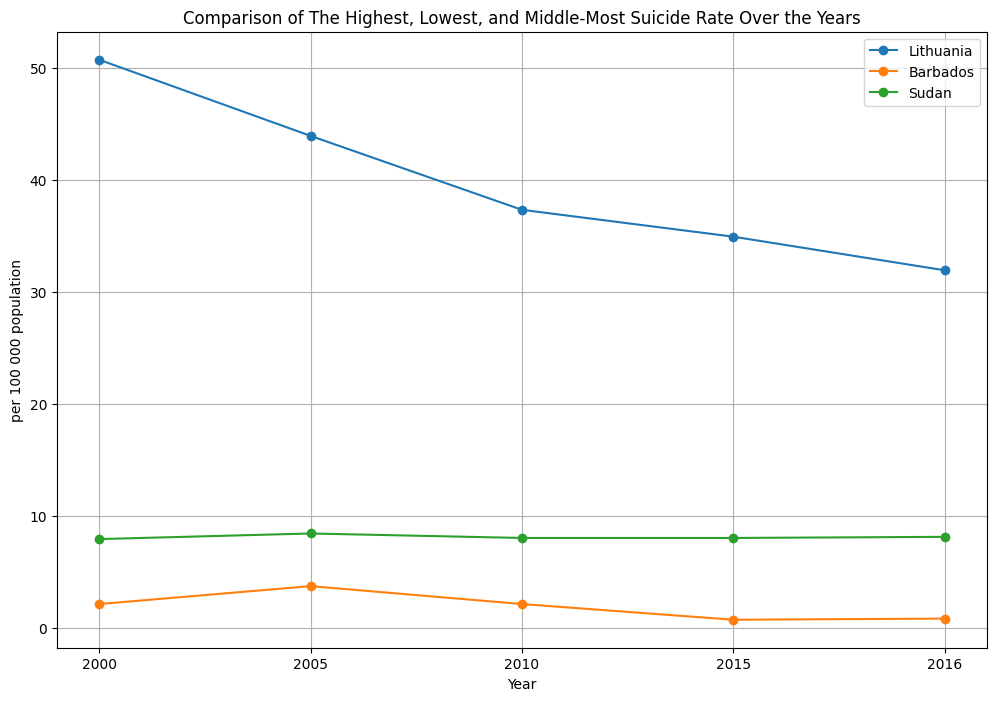

In [ ]:
#Comparison of Suicide Rates w/ Merged Data


import pandas as pd
import matplotlib.pyplot as plt

def plot_countries_data(df, country_names):
    plt.figure(figsize=(12, 8))

    for country_name in country_names:
        # Filter rows based on the specified country
        country_data = df[df['Country'] == country_name]

        if country_data.empty:
            print(f"No data found for {country_name}")
            continue

        # Sort the data by 'Year'
        country_data = country_data.sort_values(by='Year')

        # Convert 'Suicide Rate Both Genders' to numeric
        country_data['Suicide Rate Both Genders'] = pd.to_numeric(country_data['Suicide Rate Both Genders'], errors='coerce')

        # Plotting for each country
        plt.plot(country_data['Year'], country_data['Suicide Rate Both Genders'], label=country_name, marker='o')

    # Plotting settings
    plt.title('Comparison of The Highest, Lowest, and Middle-Most Suicide Rate Over the Years')
    plt.xlabel('Year')
    plt.ylabel('per 100 000 population')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'merged_data' is your new DataFrame
# Replace ['Country1', 'Country2', 'Country3'] with the list of countries you want to compare
countries_to_compare = ['Lithuania', 'Barbados', 'Sudan']

plot_countries_data(mergedData, countries_to_compare)

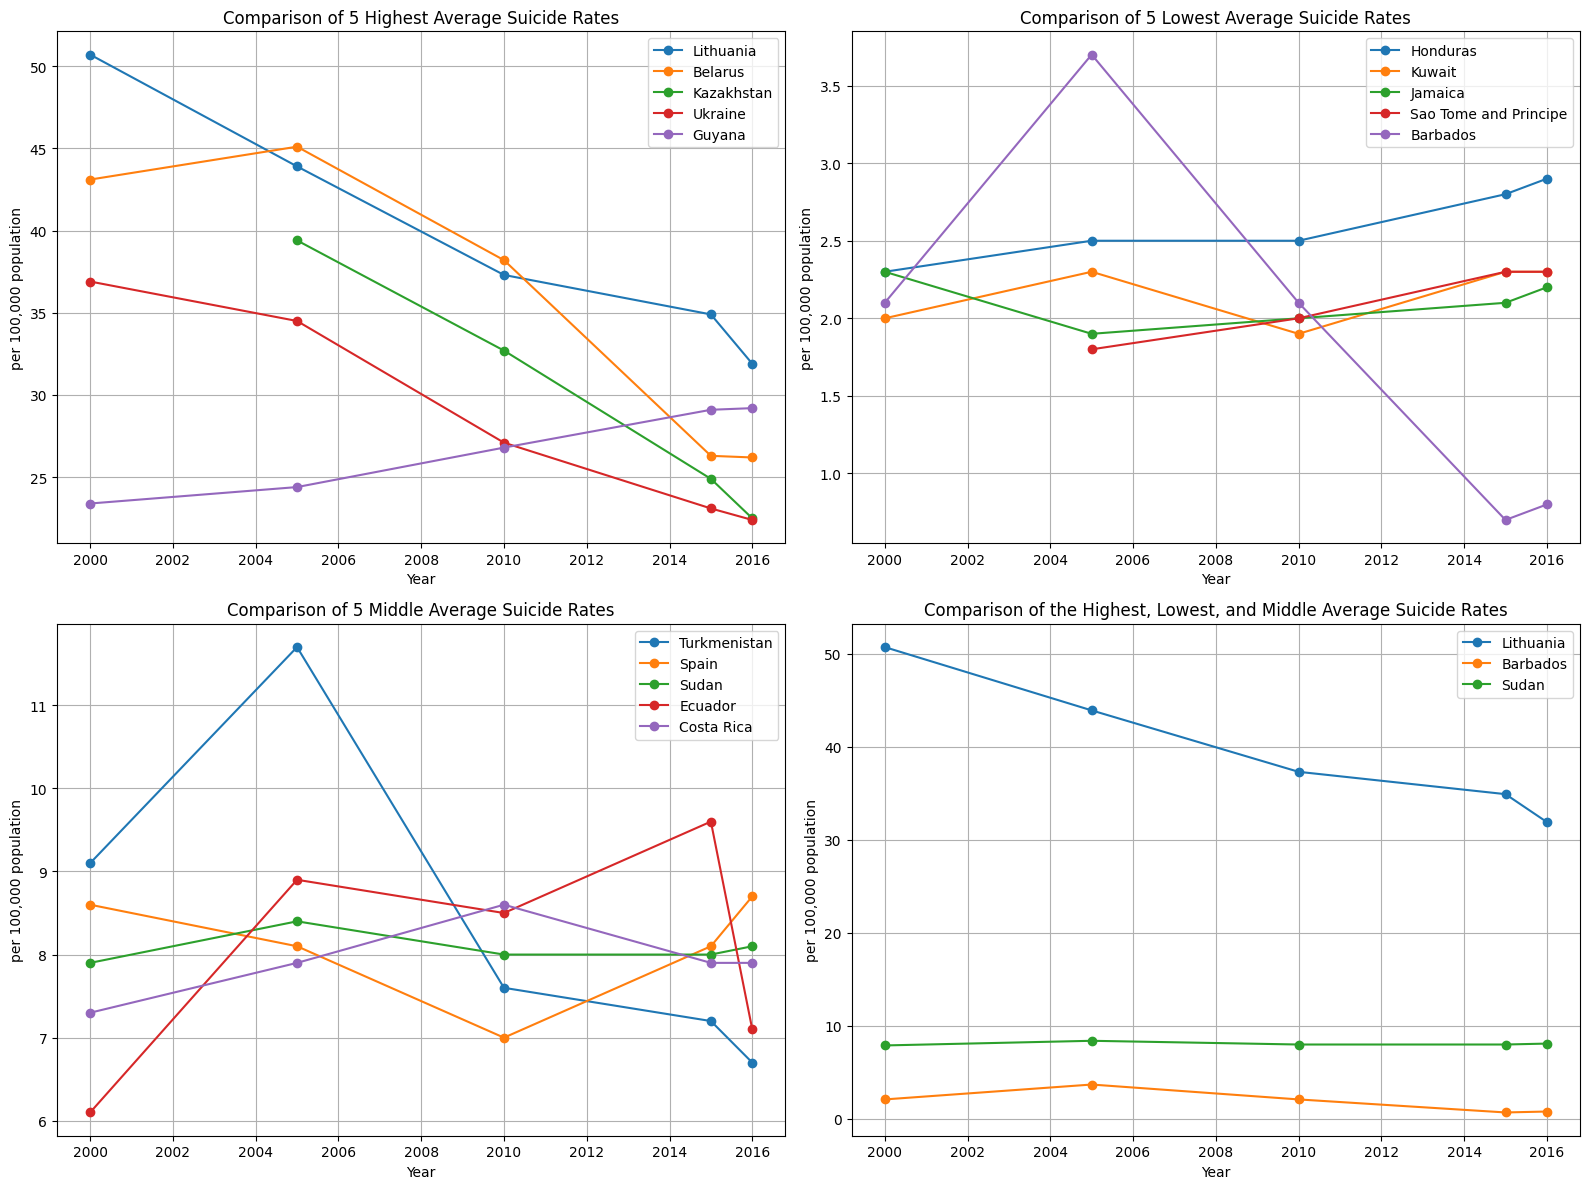

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_suicide_rates_data(ax, df, country_names, title):
    for country_name in country_names:
        country_data = df[df['Country'] == country_name]

        if country_data.empty:
            print(f"No data found for {country_name}")
            continue

        country_data = country_data.sort_values(by='Year')
        country_data['Suicide Rate Both Genders'] = pd.to_numeric(country_data['Suicide Rate Both Genders'], errors='coerce')

        ax.plot(country_data['Year'], country_data['Suicide Rate Both Genders'], label=country_name, marker='o')

    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('per 100,000 population')
    ax.legend()
    ax.grid(True)

# Assuming 'merged_data' is your new DataFrame
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top left plot
countries_to_compare_top_left = ['Lithuania', 'Belarus', 'Kazakhstan', 'Ukraine', 'Guyana']
plot_suicide_rates_data(axes[0, 0], mergedData, countries_to_compare_top_left, 'Comparison of 5 Highest Average Suicide Rates')

# Top right plot
countries_to_compare_top_right = ['Honduras', 'Kuwait', 'Jamaica', 'Sao Tome and Principe', 'Barbados']
plot_suicide_rates_data(axes[0, 1], mergedData, countries_to_compare_top_right, 'Comparison of 5 Lowest Average Suicide Rates')

# Bottom left plot
countries_to_compare_bottom_left = ['Turkmenistan', 'Spain', 'Sudan', 'Ecuador', 'Costa Rica']
plot_suicide_rates_data(axes[1, 0], mergedData, countries_to_compare_bottom_left, 'Comparison of 5 Middle Average Suicide Rates')

# Bottom right plot
countries_to_compare_bottom_right = ['Lithuania', 'Barbados', 'Sudan']
plot_suicide_rates_data(axes[1, 1], mergedData, countries_to_compare_bottom_right, 'Comparison of the Highest, Lowest, and Middle Average Suicide Rates')

plt.tight_layout()
plt.show()
